# Exemplo Cluster Hierárquico

Neste exemplo será apresentado como podemos identificar grupos por meio de dados utilizando a metodologia de análise de clusters utilizando o algoritmo de agrupamentos hierárquicos.

## Carregar pacotes

In [ ]:
library(tidyverse)
library(magrittr)
library(plotly)

## Funções gerais

In [ ]:
normalizar <- function(x){ (x - mean(x)) / sd(x) }
padronizar <- function(x){ (x - min(x)) / (max(x) - min(x)) }

## Carregar dados

Estes dados foram extraídos da análise da rede apresentada.

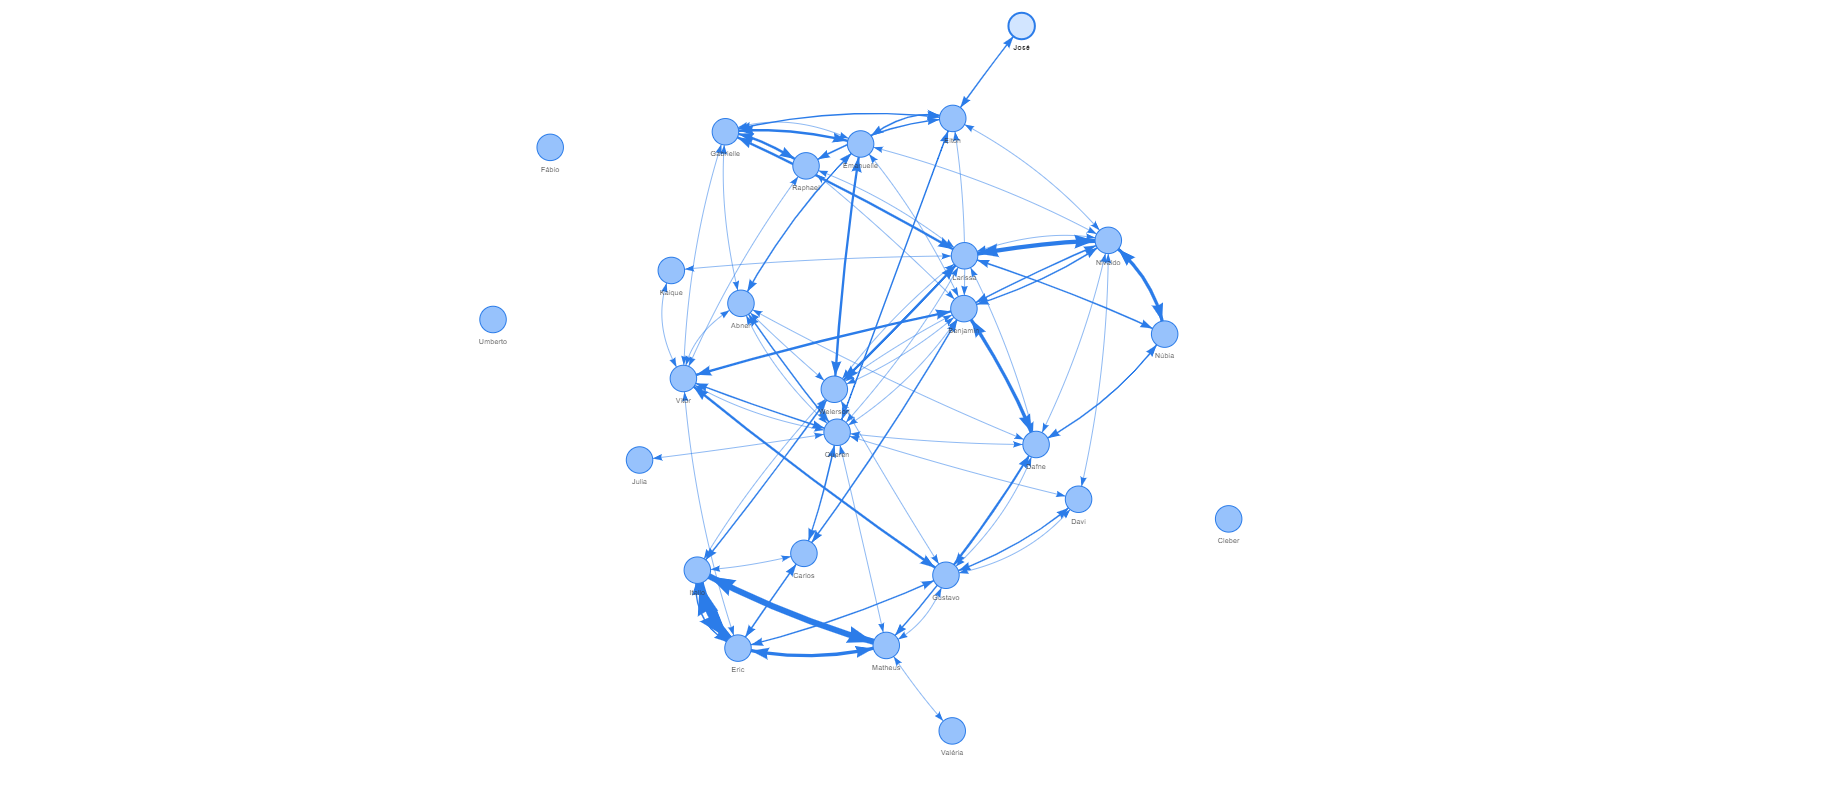

In [ ]:
dados_alunos <- read_csv('/home/vm-data-science/education/dados/metricas_rede_alunos.csv')

dados_alunos %>% head

## Padronizar os dados

In [ ]:
dados_alunos_normalizados <- dados_alunos %>% 
  mutate_if( is.numeric, normalizar )

dados_alunos_normalizados %>% head

## Algumas visualizações

In [ ]:
dados_alunos_normalizados %>% 
  plot_ly( x = ~qtd_conexoes,
           y = ~nivel_influencia,
           marker = list( size = 15),
           type = 'scatter',
           mode = 'markers',
           text = ~paste( "</br> Aluno: ", aluno ),
           hoverinfo = 'text' )

In [ ]:
dados_alunos_normalizados %>% 
  plot_ly( x = ~nivel_influencia,
           y = ~nivel_integracao,
           z = ~qtd_conexoes,
           marker = list( size = 15),
           type = 'scatter3d',
           mode = 'markers',
           text = ~paste( "</br> Aluno: ", aluno ),
           hoverinfo = 'text' )

## *Cluster* Hierárquico

- Obtemos a matriz de distâncias.

In [ ]:
distancia <- dist( x = dados_alunos_normalizados %>% select( -aluno), 
                   method =  'euclidian' )

distancia

- Geramos o modelo.

In [ ]:
modelo_cluster_hierarquico <- hclust( distancia,
                                      method = 'single' )

## Número de grupos

- Dendograma

In [ ]:
plot(modelo_cluster_hierarquico)
rect.hclust( modelo_cluster_hierarquico, 
             k = 2, 
             border = "red" )

- Coeficiente de aglomereação

In [ ]:
data_frame( grupos = 22:1 + 1,
           aglomeracao = modelo_cluster_hierarquico$height ) %>% 
  plot_ly( x = ~grupos,
           y = ~aglomeracao,
           type = 'scatter',
           mode = 'lines+markers',
           marker = list(size = 10, color = 'red') ) %>% 
  layout( xaxis = list( autorange="reversed") )

## Interpretação

- Adiciona os grupos no banco de dados.

In [ ]:
dados_alunos %<>% 
  mutate( grupos = as.factor( cutree(modelo_cluster_hierarquico, 
                          k = 4 ) ) )

dados_alunos %>% head

In [ ]:
dados_alunos %>% 
  count( grupos )

In [ ]:
dados_alunos %>% 
  plot_ly( x = ~nivel_influencia,
           y = ~nivel_integracao,
           color = ~grupos,
           marker = list( size = 15),
           type = 'scatter',
           mode = 'markers',
           text = ~paste( "</br> Aluno: ", aluno,
                          "</br> Grupo: ", grupos ),
           hoverinfo = 'text' )

In [ ]:
dados_alunos %>% 
  plot_ly( x = ~nivel_influencia,
           y = ~nivel_integracao,
           z = ~qtd_conexoes,
           color = ~grupos,
           marker = list( size = 15),
           type = 'scatter3d',
           mode = 'markers',
           text = ~paste( "</br> Aluno: ", aluno,
                          "</br> Grupo: ", grupos ),
           hoverinfo = 'text' )

# Perguntas

1 - Você conseguiu identificar algum *outlier*?

2 - Como ficaria a estrutura dos grupos se você não considerar este *outlier* nas análises?